# ECON 425 HW 3 - Lasso, Ridge and Gradient Descent

In [1]:
#Importing essential packages and libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Question 1 - iii)

In [2]:
#Defining a for-loop to generate ranges of values for y and dy/dx
dy_dx_range = []
y_range = []
x_range = np.linspace(-2.5, 2.5, num=100)
alpha = 0.1
for i in x_range: 
    x_0 = i
    dy_dx = 4*(x_0**3) - 12*x_0 + 4
    y = (x_0)**4 - 6*(x_0)**2 + 4*(x_0) + 18
    x_1 = x_0 - alpha*dy_dx
    dy_dx_range.append(dy_dx)
    y_range.append(y)

[]

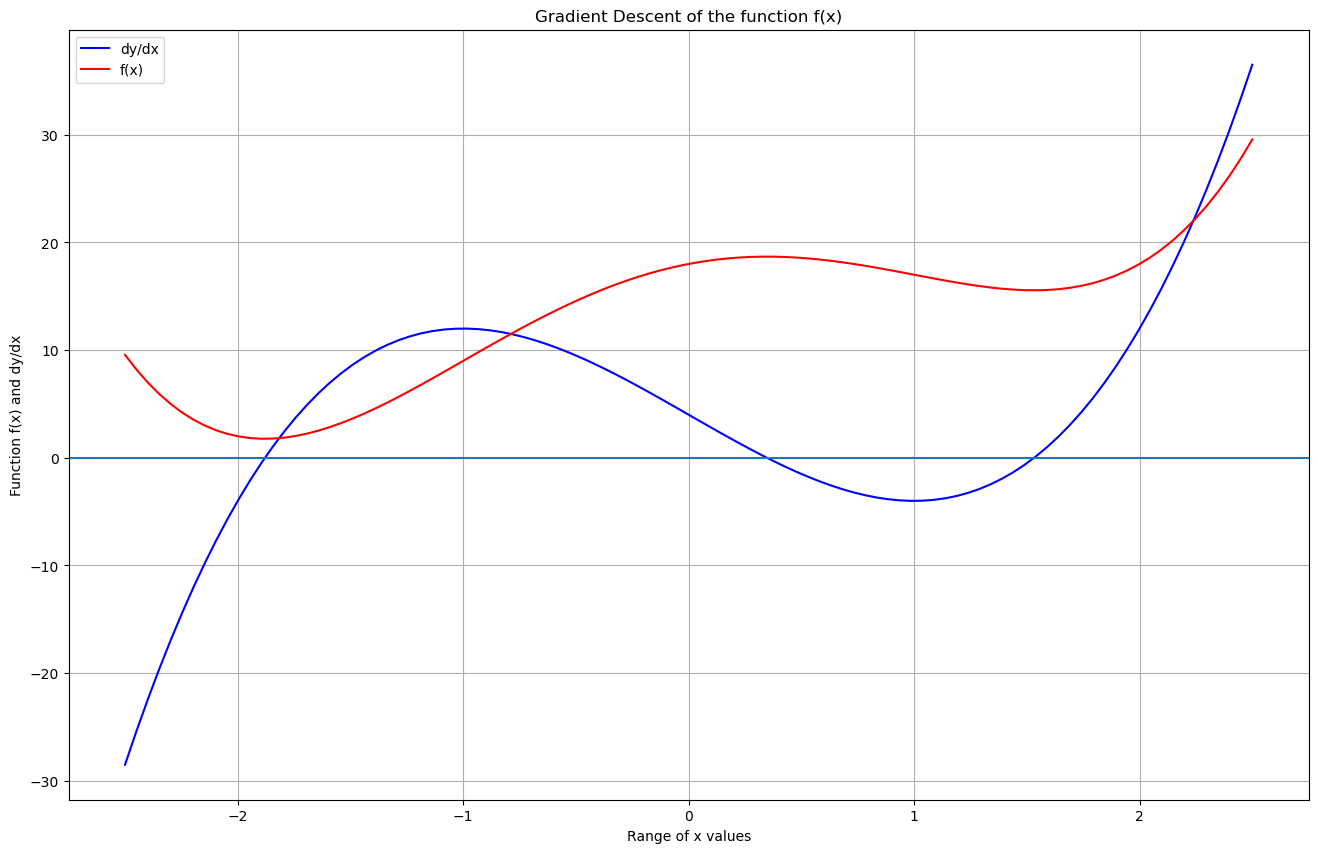

In [3]:
#Plotting the function along with its first order derivative to visualise local minimas and maximas
plt.figure(figsize=(16,10))
plt.plot(x_range, dy_dx_range, color = "blue", label = "dy/dx")
plt.plot(x_range, y_range, color = "red", label = "f(x)")
plt.axhline(y=0)
plt.title("Gradient Descent of the function f(x)")
plt.xlabel("Range of x values")
plt.ylabel("Function f(x) and dy/dx")
plt.legend()
plt.grid()
plt.plot()

## By plotting both the first-order derivative and y itself, the local maxima/minima points can be easily visualised. 

### Derivative calculus states that an inflection point of any linear, onto function is at the point where the first-order derivative is equal to zero. 

Here there are approximately three points where the first-order derivative (dy/dx) is equal to 0. The first point visually corresponds clearly with a local minima. The second point clearly visually corresponds with a local maxima, and the third point with a local minima again. 

Within the constrained range of x within 100 real numbers belonging to the set {-2.5,2.5}, we observe three inflection points, with two minimas and one maxima. 

Without exploring the second order derivative itself, no proclamation regarding the identity of the global maximas/minimas can be made. Within the contsrained range however, it is apparent that the first minima, occurring close to x ~= -1.7 is the absolute local minima for this range, and the maxima occurring at x ~= 0.3 is the absolute local maxima. 

## Question 1 - iv)

In [4]:
#Defining a function to generate a range of values of x, y, dy/dx
def gradient_descent(steps, start, alpha, convergence_point=1e-4):
    results = {"dy_dx_range_gd": [],
    "x_1_range_gd" : [],
    "y_range_gd" : []}
    x_range_gd = []
    run = 0
    x_0 = start
    while run < steps: 
        dy_dx = 4 * (x_0**3) - 12 * x_0 + 4
        if np.abs(dy_dx) < convergence_point:
            print(f"Converged after {run} iterations.")
            break
        y = (x_0)**4 - 6*(x_0)**2 + 4*(x_0) + 18
        x_1 = x_0 - alpha * dy_dx
        results['dy_dx_range_gd'].append(dy_dx)
        results['x_1_range_gd'].append(x_1)
        results['y_range_gd'].append(y)
        x_range_gd.append(x_0)
        x_0 = x_1
        run += 1
    
    return results, x_range_gd

In [5]:
#Applying the function to x0 = 1
start = 1
alpha = 0.1
results_1, x_range_gd1 = gradient_descent(steps=3, start=start, alpha=alpha)

In [6]:
#Applying the function to x0 = 0
start = 0
alpha = 0.1
results_2, x_range_gd2 = gradient_descent(steps=3, start=start, alpha=alpha)

[]

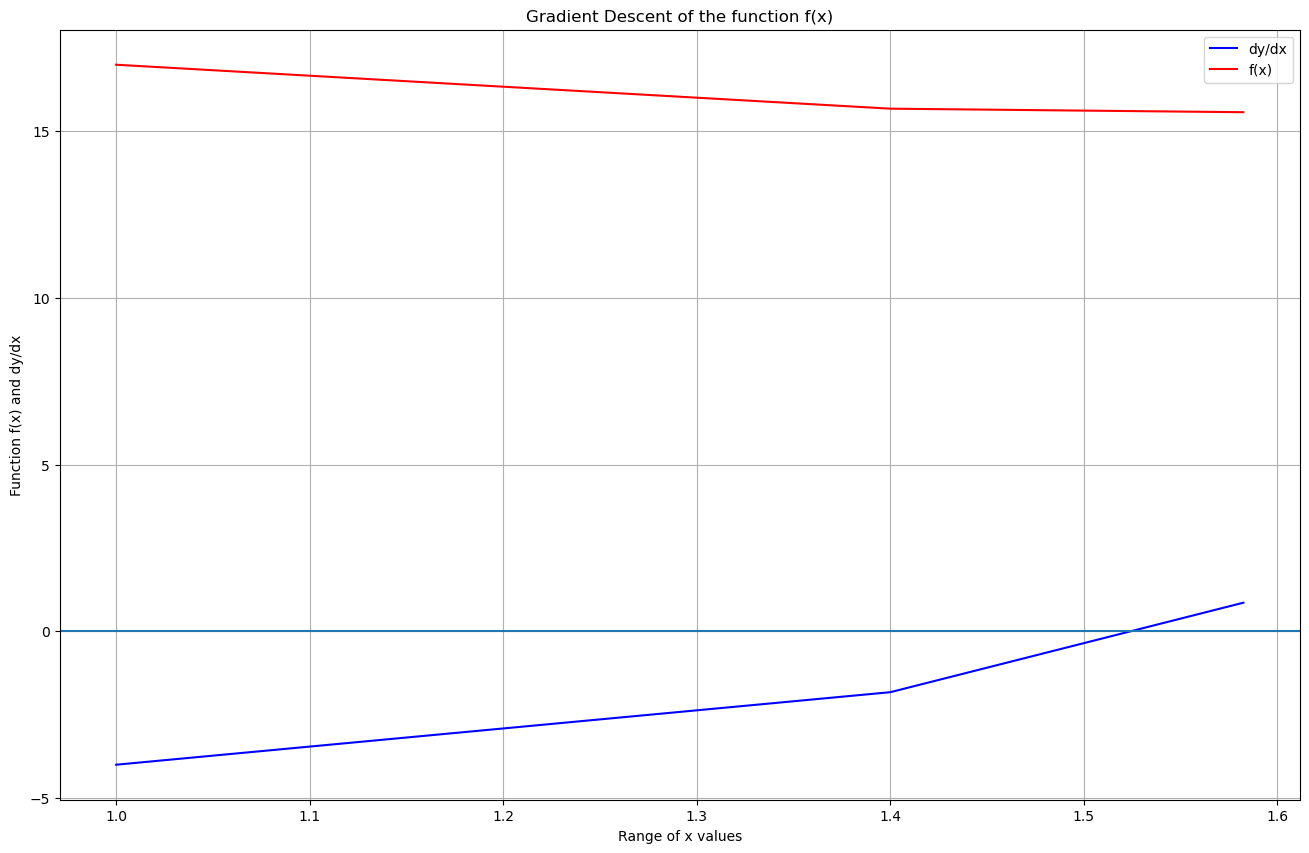

In [7]:
#Plotting the function and the gradient descent
plt.figure(figsize=(16,10))
plt.plot(x_range_gd1, results_1["dy_dx_range_gd"], color = "blue", label = "dy/dx")
plt.plot(x_range_gd1, results_1["y_range_gd"], color = "red", label = "f(x)")
plt.axhline(y=0)
plt.title("Gradient Descent of the function f(x)")
plt.xlabel("Range of x values")
plt.ylabel("Function f(x) and dy/dx")
plt.legend()
plt.grid()
plt.plot()

[]

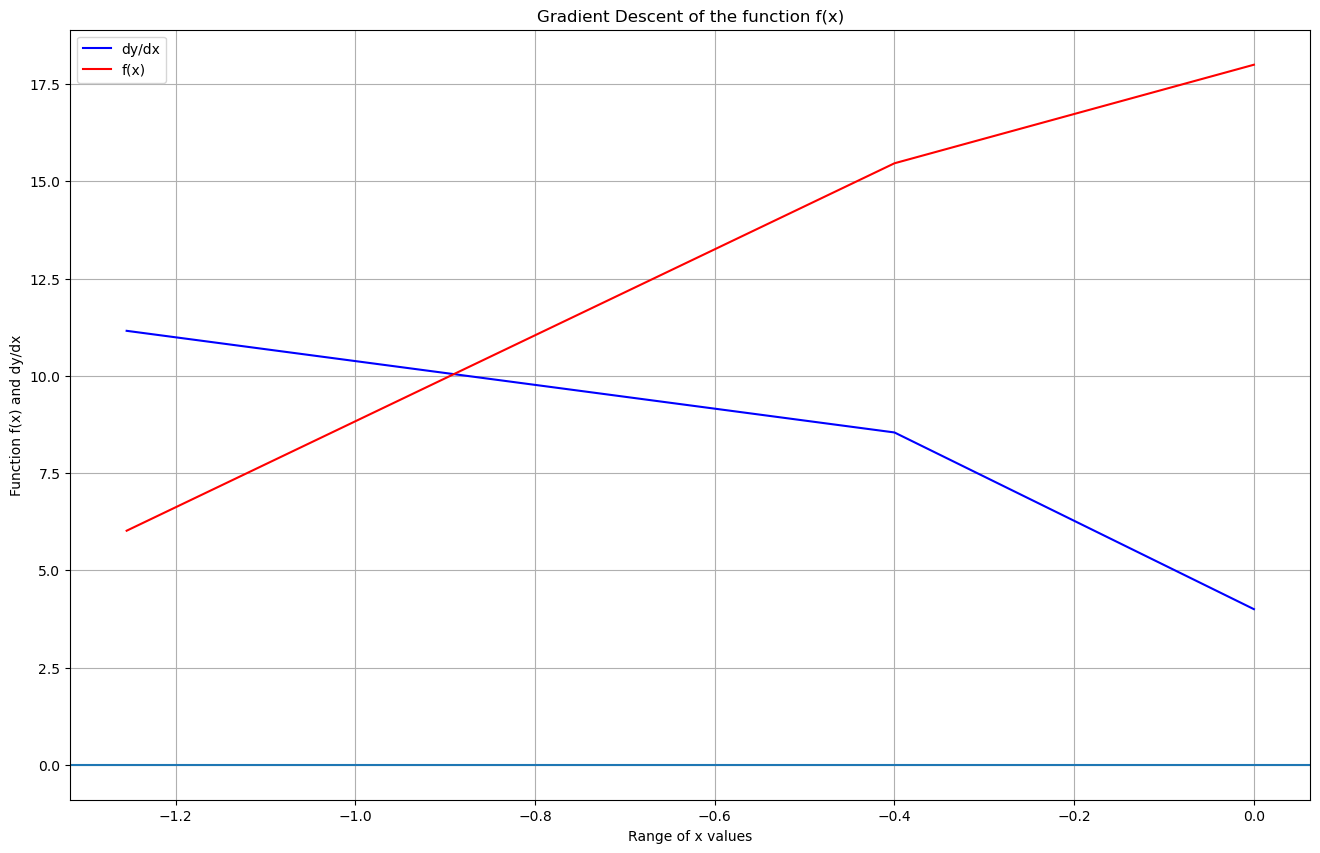

In [8]:
#Plotting the function and the gradient descent
plt.figure(figsize=(16,10))
plt.plot(x_range_gd2, results_2["dy_dx_range_gd"], color = "blue", label = "dy/dx")
plt.plot(x_range_gd2, results_2["y_range_gd"], color = "red", label = "f(x)")
plt.axhline(y=0)
plt.title("Gradient Descent of the function f(x)")
plt.xlabel("Range of x values")
plt.ylabel("Function f(x) and dy/dx")
plt.legend()
plt.grid()
plt.plot()

## Through both visual examination of the plots, and an examination of the arrays returned by the function, it is clearly apparent that Gradient Descent does not converge, as the global minima has not been discovered. 

### Gradient descent converges at the value of x which delivers the absolute global minima of the first-order derivative of the function itself. Due to the extremely limited number of steps taken here (3), it is unable to converge. 

The failure to converge however is not similar in both cases. The gradient descent model itself is clearly influenced by the "seed" set at the input stage, which explains the difference in the plots between 1 and 0. 

The gradient descent performed with x0 = 1 clearly performs better than when x0 = 0. 

In [9]:
#Applying the function to x0 = 1, and alpha = 0.01
start = 1
alpha = 0.01
results_3, x_range_gd3 = gradient_descent(steps=20, start=start, alpha=alpha)

In [10]:
#Applying the function to x0 = 0, and alpha = 0.01
start = 0
alpha = 0.01
results_4, x_range_gd4 = gradient_descent(steps=20, start=start, alpha=alpha)

[]

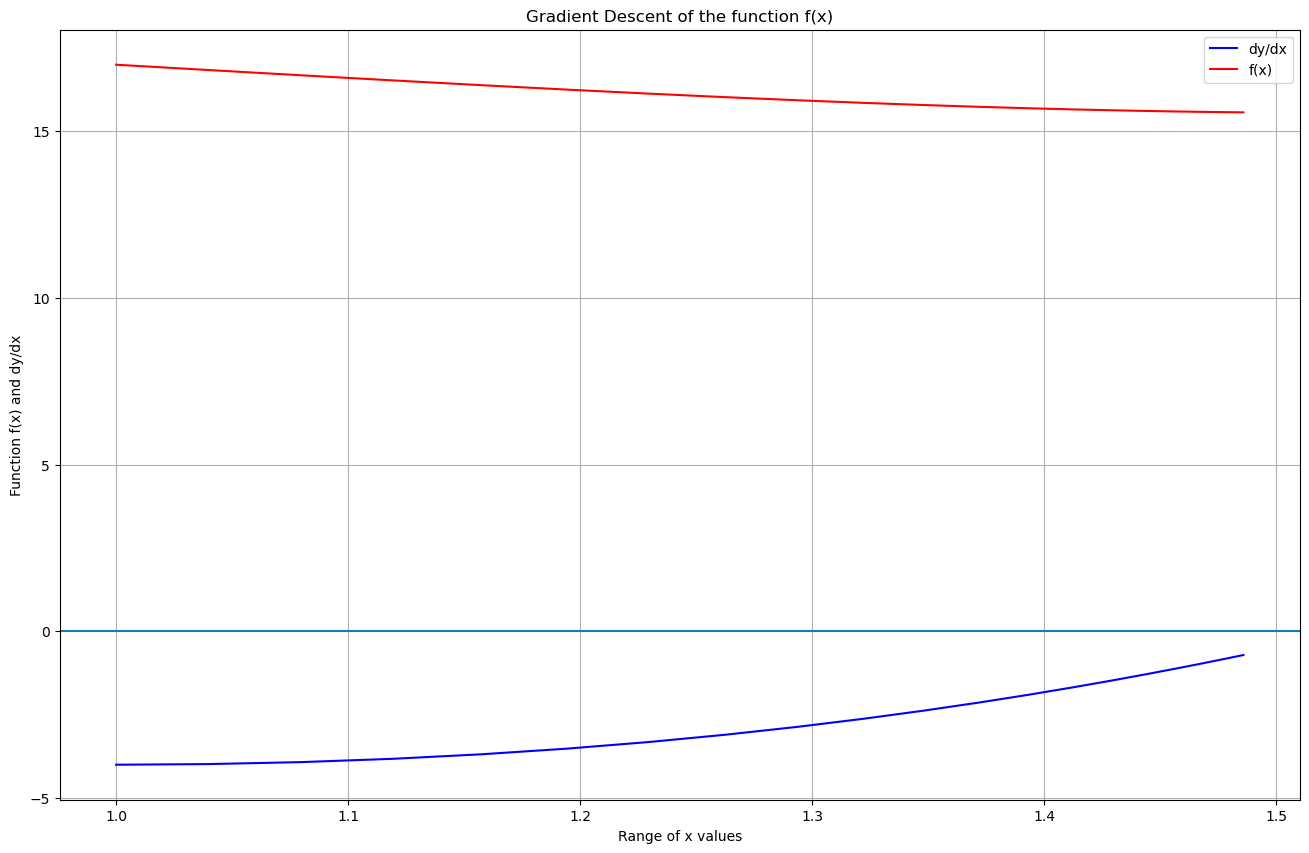

In [11]:
plt.figure(figsize=(16,10))
plt.plot(x_range_gd3, results_3["dy_dx_range_gd"], color = "blue", label = "dy/dx")
plt.plot(x_range_gd3, results_3["y_range_gd"], color = "red", label = "f(x)")
plt.axhline(y=0)
plt.title("Gradient Descent of the function f(x)")
plt.xlabel("Range of x values")
plt.ylabel("Function f(x) and dy/dx")
plt.legend()
plt.grid()
plt.plot()

[]

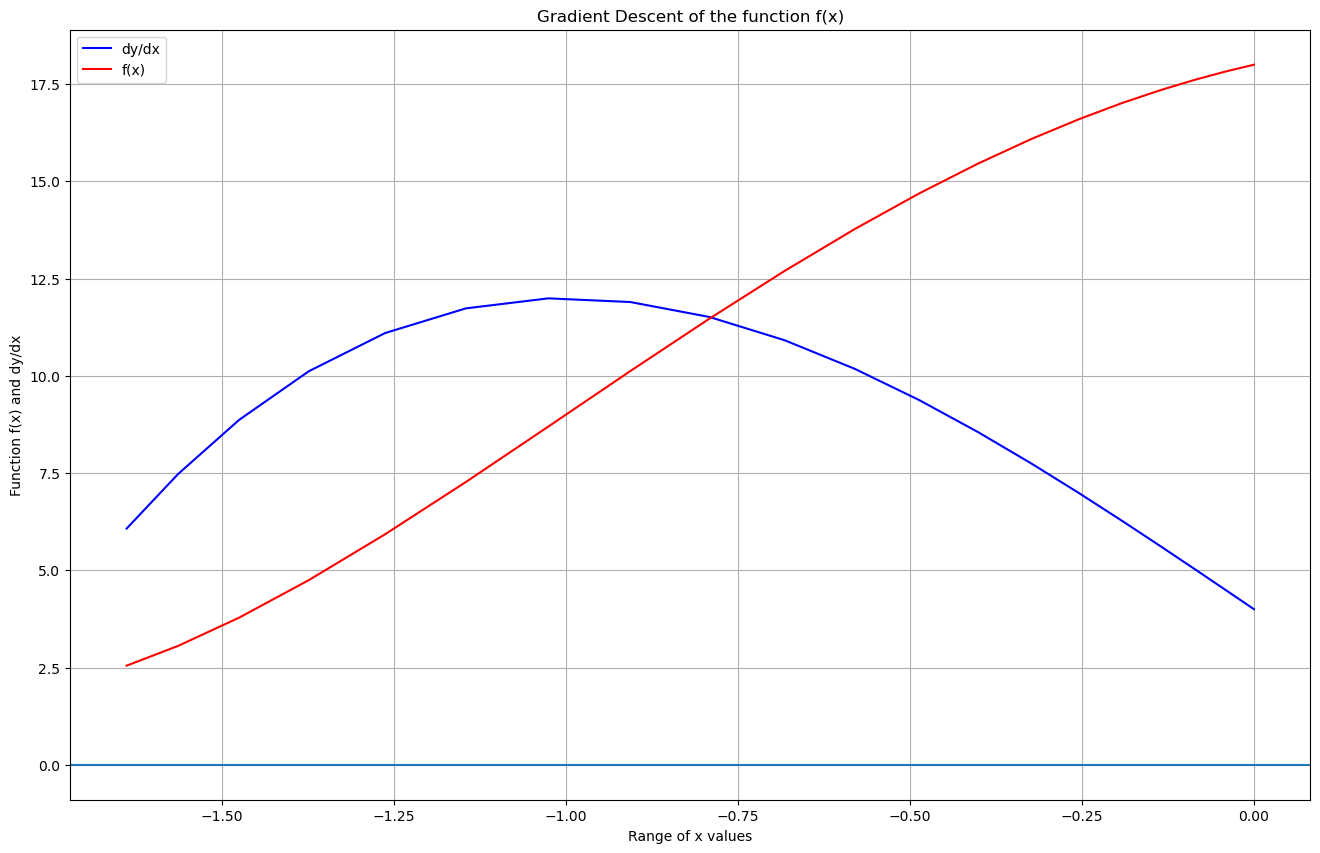

In [12]:
plt.figure(figsize=(16,10))
plt.plot(x_range_gd4, results_4["dy_dx_range_gd"], color = "blue", label = "dy/dx")
plt.plot(x_range_gd4, results_4["y_range_gd"], color = "red", label = "f(x)")
plt.axhline(y=0)
plt.title("Gradient Descent of the function f(x)")
plt.xlabel("Range of x values")
plt.ylabel("Function f(x) and dy/dx")
plt.legend()
plt.grid()
plt.plot()

## With a changed learning rate of 0.01, the graident descents perform quite differently from before. 

### Once again, neither gradient descent achieves convergence, due to the global minima not being discovered. This is indicated partially by the dy/dx line never intersecting the y = 0 line, which shows there was never a single inflection point discovered. 

Although the number of steps has been expanded here from 3 to 20, it still appears to be insufficient for gradient descent to converge. 
Once again, The gradient descent performed with x0 = 1 clearly performs better than when x0 = 0. 

## Question 2

In [13]:
#Importing data from file
college_data = pd.read_csv("E:/UCLA/Winter 2024/ECON 425/College.csv")
college_data["Private"] = college_data["Private"].map({"Yes" : 1, "No": 0})
college_data

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


## Question 2 - i)

In [14]:
#Splitting the data into train and test sets
train_data = college_data.iloc[:600, :]
train_data

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,222,185,91,16,41,484,541,11010,5208,550,500,58,78,10.4,26,9586,78
596,1,2425,1818,601,62,93,2110,95,12240,5150,500,490,94,96,9.6,20,14703,93
597,1,7033,5125,1223,47,75,4941,1534,19040,5950,350,800,98,98,9.1,21,16920,74
598,1,626,372,145,12,34,983,40,7700,3400,450,800,70,70,21.9,28,4933,52


In [15]:
test_data = college_data.iloc[600:,:]
test_data

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
600,1,484,384,177,9,45,634,78,7800,2950,500,600,60,88,14.1,9,6864,64
601,1,3495,1712,528,49,84,1915,123,18732,6204,450,1024,94,96,11.5,49,15411,88
602,0,4800,2900,1515,14,48,7764,1472,6874,2394,518,1890,73,78,19.2,14,5901,56
603,0,1797,1260,938,24,35,6960,4698,4440,5175,750,2200,96,96,6.7,16,16352,33
604,0,3235,3108,2133,25,65,9978,1530,5028,3300,500,2000,73,89,14.8,10,6820,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [16]:
#Defining the x and y variables
y_train = train_data["Apps"]
X_train = train_data.drop(columns = ["Apps"])

## Question 2 - ii)

In [17]:
#Building a OLS model using scikit-learn linear regression
reg = LinearRegression()
reg_model = reg.fit(X_train, y_train)
reg_coef = reg_model.coef_

In [18]:
y_test = test_data["Apps"]
X_test = test_data.drop(columns = ["Apps"])

In [19]:
y_pred_ols = reg_model.predict(X_test)
MSE_ols = mean_squared_error(y_test, y_pred_ols)

In [20]:
print("The Mean Squared Error obtained from the Linear OLS model is:", MSE_ols)

The Mean Squared Error obtained from the Linear OLS model is: 1502077.4348215738


## Question 2 - iii)

In [21]:
#Scaling and transforming the variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
#Building the Lasso model with 20-fold cross validation
alpha_range = np.linspace(0.01, 60, num=1000)
lassoCV = LassoCV(alphas = alpha_range, cv=20)
lasso_model = lassoCV.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
lasso_coef = lasso_model.coef_

In [23]:
print("The Mean Squared Error obtained from the Lasso model is:", MSE_lasso)

The Mean Squared Error obtained from the Lasso model is: 1502016.2277789332


## Question 2 - iv)

In [24]:
#Building the Ridge model with Leave-one-out cross validation
ridgeCV = RidgeCV(alphas = alpha_range)
ridge_model = ridgeCV.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
ridge_coef = ridge_model.coef_

In [25]:
print("The Mean Squared Error obtained from the Ridge model is:", MSE_ridge)

The Mean Squared Error obtained from the Ridge model is: 1501857.1669602478


[]

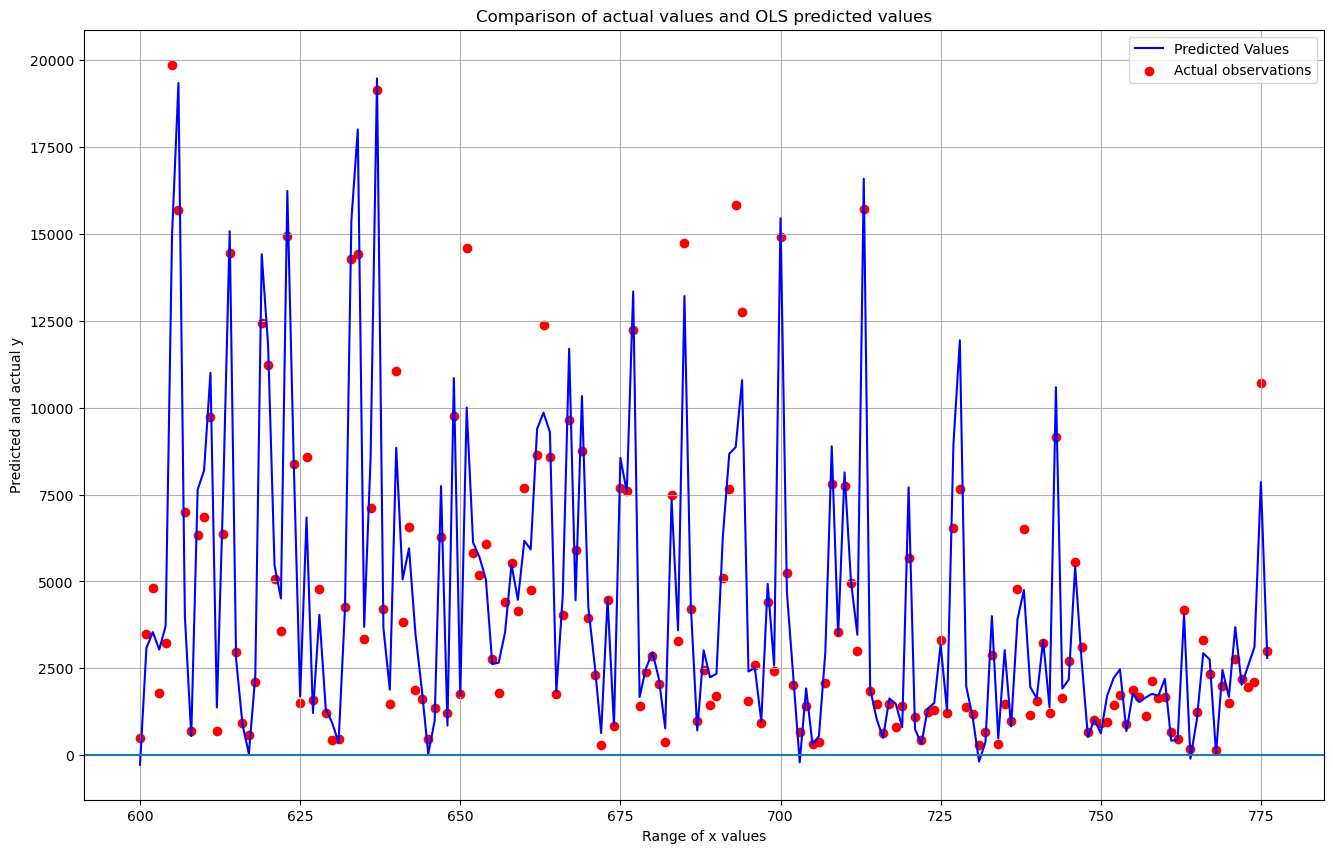

In [26]:
#Plotting the actual values and the predicted values from the OLS model
plt.figure(figsize=(16,10))
plt.plot(X_test.index,y_pred_ols, color = "blue", label = "Predicted Values")
plt.scatter(X_test.index, y_test, color = "red", label = "Actual observations")
plt.axhline(y=0)
plt.title("Comparison of actual values and OLS predicted values")
plt.xlabel("Range of x values")
plt.ylabel("Predicted and actual y")
plt.legend()
plt.grid()
plt.plot()

[]

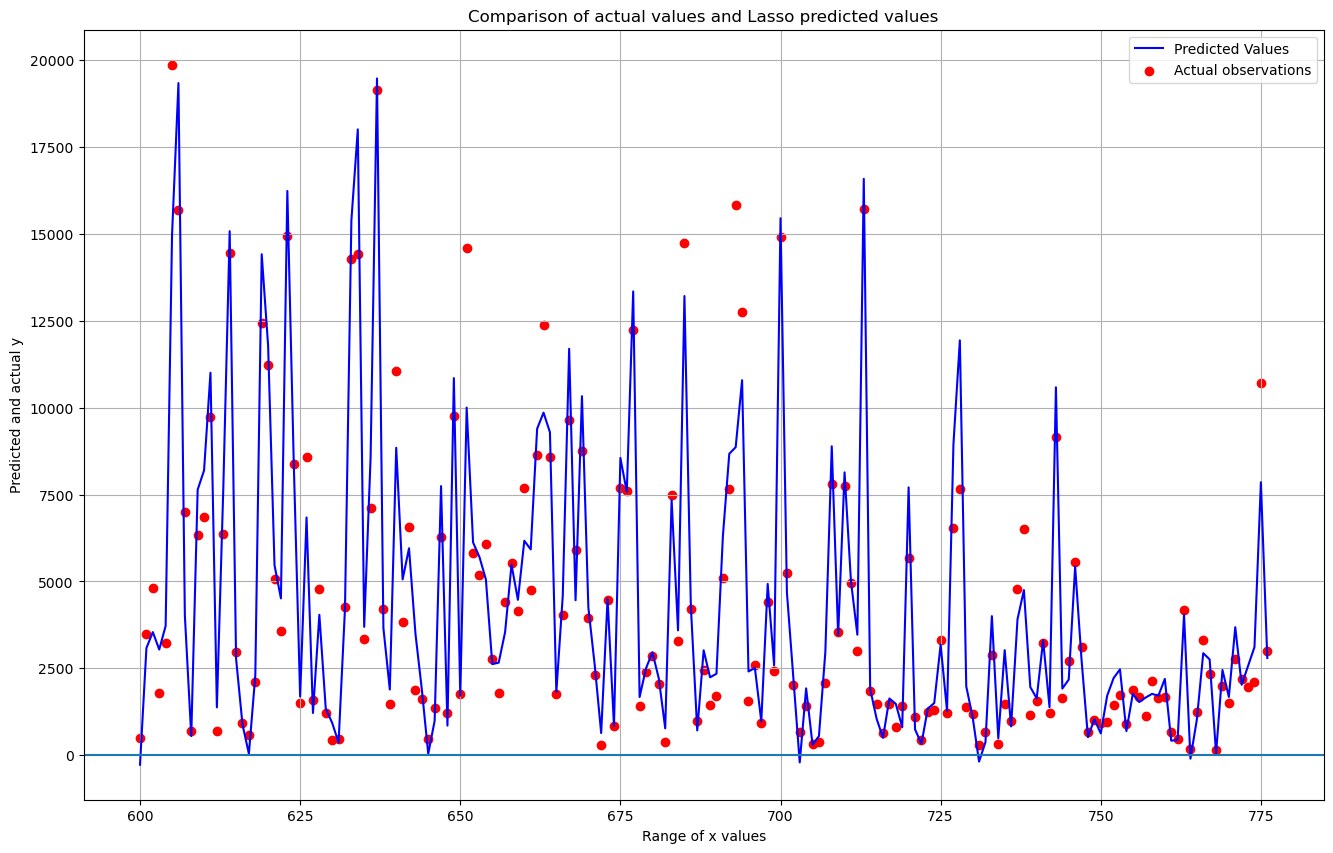

In [27]:
#Plotting the actual values and the predicted values from the Lasso model
plt.figure(figsize=(16,10))
plt.plot(X_test.index, y_pred_lasso, color = "blue", label = "Predicted Values")
plt.scatter(X_test.index, y_test, color = "red", label = "Actual observations")
plt.axhline(y=0)
plt.title("Comparison of actual values and Lasso predicted values")
plt.xlabel("Range of x values")
plt.ylabel("Predicted and actual y")
plt.legend()
plt.grid()
plt.plot()

[]

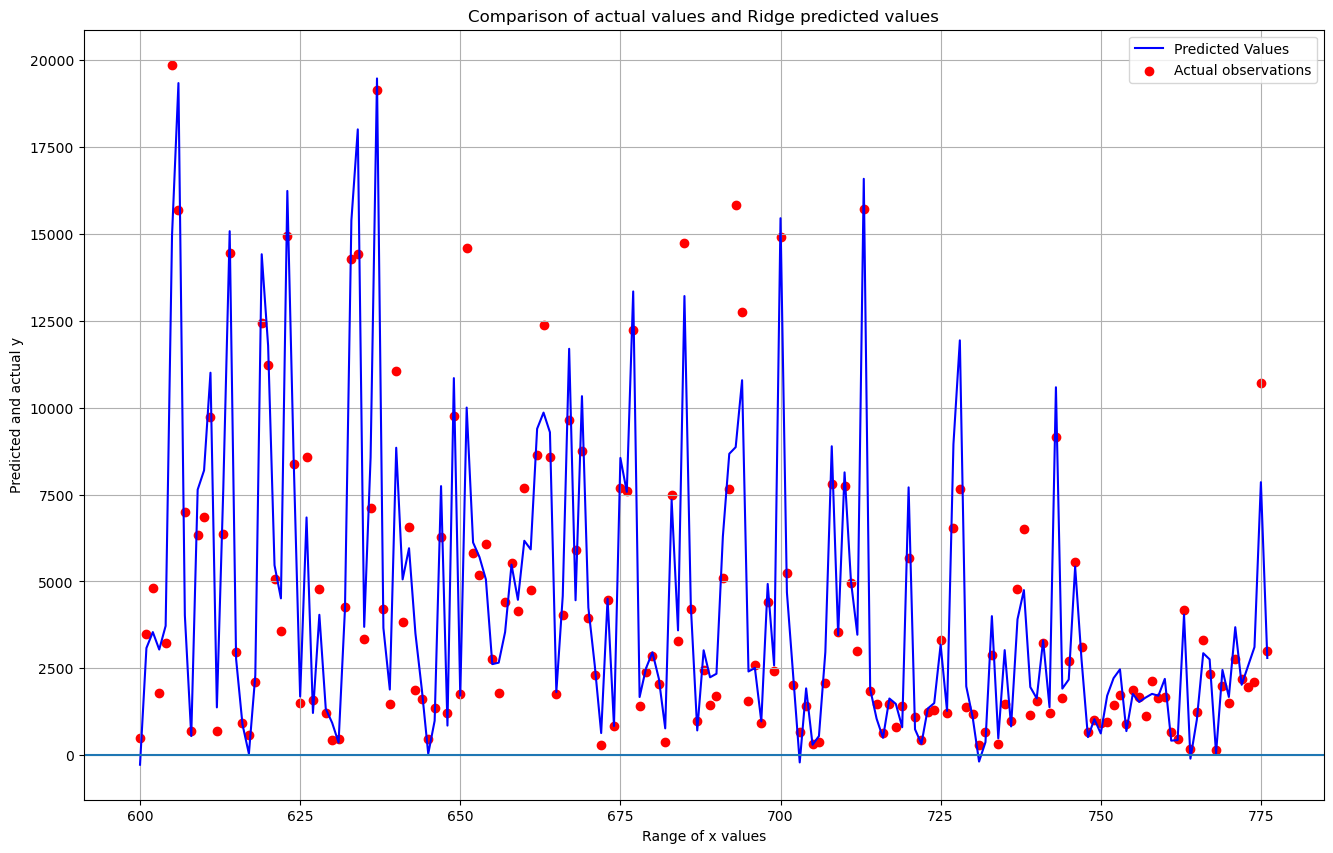

In [28]:
#Plotting the actual values and the predicted values from the Ridge model
plt.figure(figsize=(16,10))
plt.plot(X_test.index, y_pred_ridge, color = "blue", label = "Predicted Values")
plt.scatter(X_test.index, y_test, color = "red", label = "Actual observations")
plt.axhline(y=0)
plt.title("Comparison of actual values and Ridge predicted values")
plt.xlabel("Range of x values")
plt.ylabel("Predicted and actual y")
plt.legend()
plt.grid()
plt.plot()

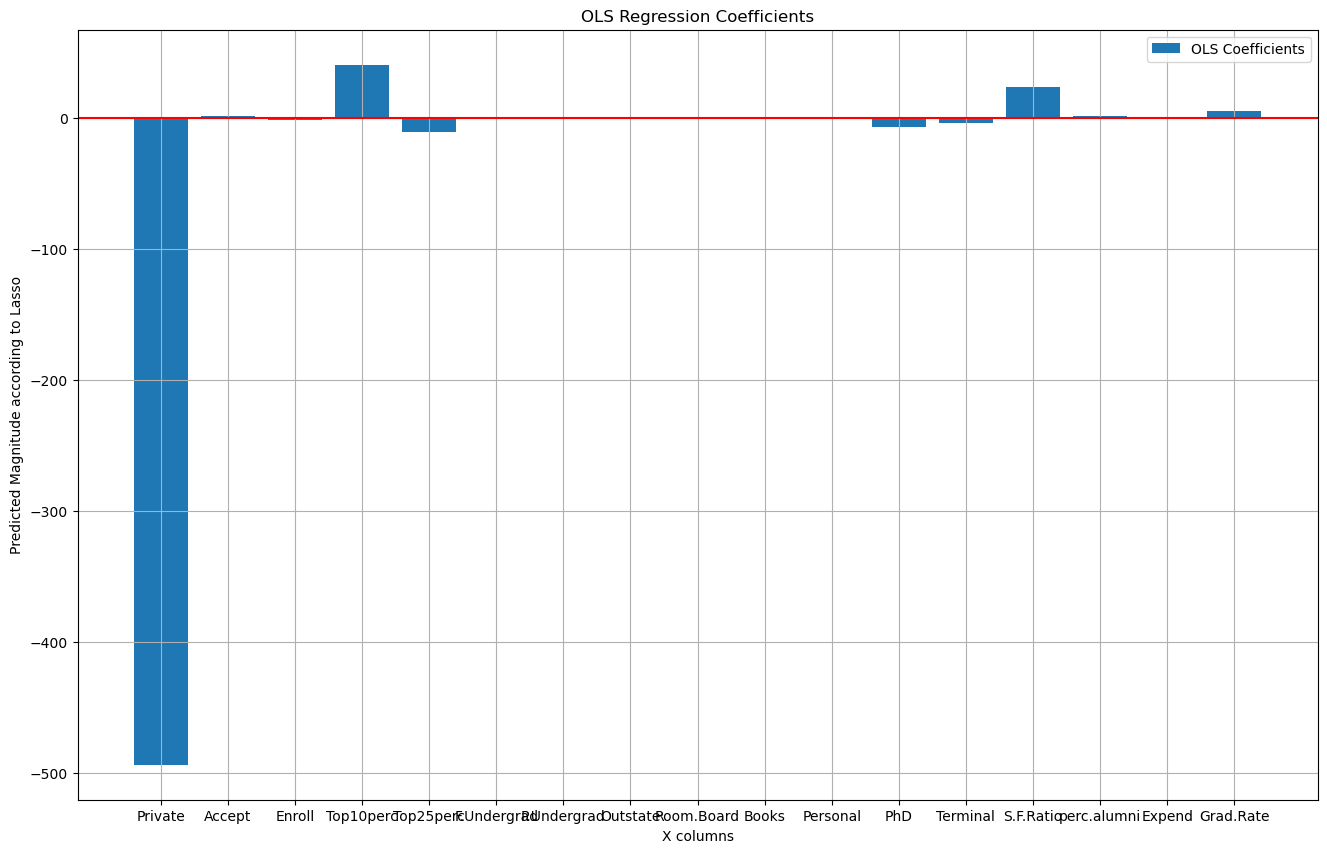

In [30]:
#Plotting the magnitude of the coefficients for the X columns as predicted by the model
plt.figure(figsize=(16,10))
plt.bar(range(len(reg_coef)), reg_coef, label = "OLS Coefficients")
plt.axhline(0, color="red")
plt.xticks(range(len(reg_coef)), X_train.columns)
plt.title('OLS Regression Coefficients')
plt.xlabel("X columns")
plt.ylabel("Predicted Magnitude according to Lasso")
plt.legend()
plt.grid()
plt.show()

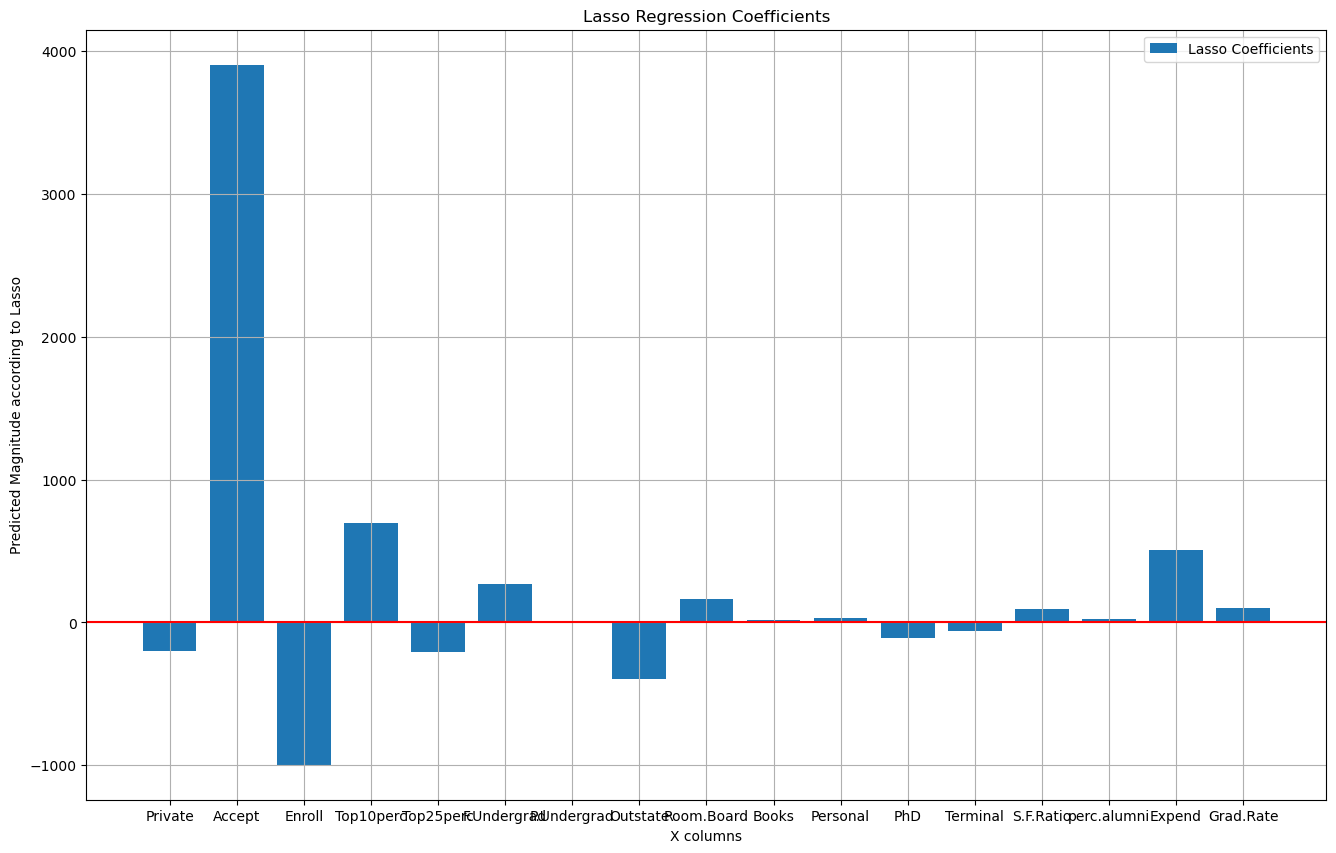

In [31]:
#Plotting the magnitude of the coefficients for the X columns as predicted by the model
plt.figure(figsize=(16,10))
plt.bar(range(len(lasso_coef)), lasso_coef, label = "Lasso Coefficients")
plt.axhline(0, color="red")
plt.xticks(range(len(lasso_coef)), X_train.columns)
plt.title('Lasso Regression Coefficients')
plt.xlabel("X columns")
plt.ylabel("Predicted Magnitude according to Lasso")
plt.legend()
plt.grid()
plt.show()

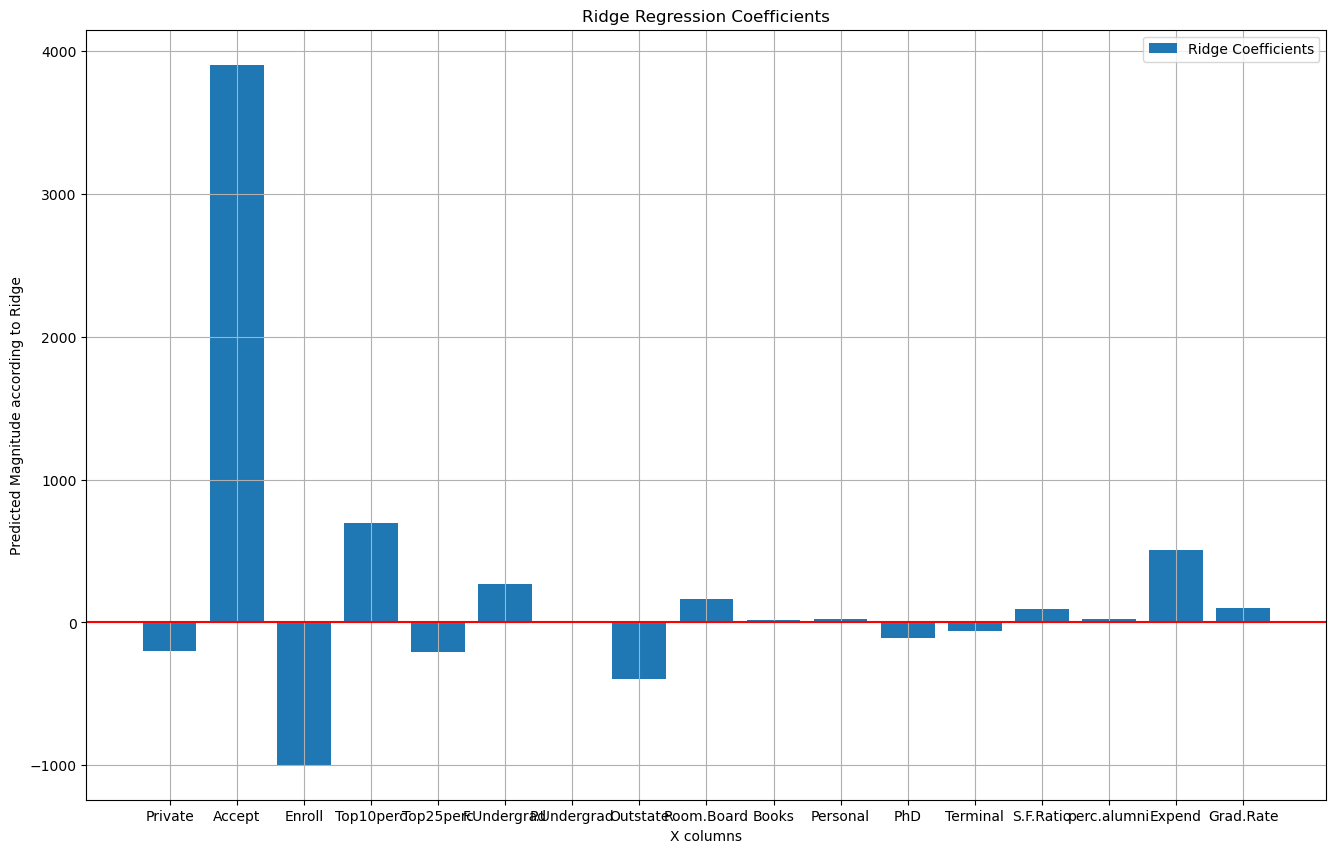

In [32]:
#Plotting the magnitude of the coefficients for the X columns as predicted by the model
plt.figure(figsize=(16,10))
plt.bar(range(len(ridge_coef)), ridge_coef, label = "Ridge Coefficients")
plt.axhline(0, color="red")
plt.xticks(range(len(ridge_coef)), X_train.columns)
plt.title('Ridge Regression Coefficients')
plt.xlabel("X columns")
plt.ylabel("Predicted Magnitude according to Ridge")
plt.legend()
plt.grid()
plt.show()

## Question 2 - v)

In [33]:
print("The Mean Squared error for the OLS model is:", MSE_ols)
print("The Mean Squared error for the Lasso model is:", MSE_lasso)
print("The Mean Squared error for the Ridge model is:", MSE_ridge)

The Mean Squared error for the OLS model is: 1502077.4348215738
The Mean Squared error for the Lasso model is: 1502016.2277789332
The Mean Squared error for the Ridge model is: 1501857.1669602478


## The comparison of the models is on the basis of performance relative to the actual values observed, as captured by both the initial plots, and the mean squared error. Another metric for comparison is also the comparison of the handling of the X columns, which it has to assign coefficients to. 

### The initial hypothesis formulated purely on the basis of the sole quantitative metric, the test MSE, is that the ridge model augmented with leave-one-out cross-validation is superior to both the Linear OLS, and the Lasso augmented with 20-fold cross-validation. 

However, the analysis cannot be solely limited to the test MSE. Test MSE is an excellent metric, as it simultaneously captures the performance of the model, and is standardised, meaning it can be used as a means of objective comparison between models built on the same data. 

While neither model displays a Test MSE that is particularly low, the Ridge model with it's test MSE of 1501857.1669602478, is noticeably lower than either the Linear OLS's 1502077.4348215738 or the Lasso's 1502016.2277789332. A mean squared error of approximately 1.5 million does not boost confidence, but amongst the models developed, it clearly stands out. 

Since the margin of superiority is not high, we turn to the visual plots to try and spot differences between the models. 

The first three plots compare the predicted values and the actual observed values. This plot is limited in its usefulness here, as the model's appear to have generated very similar predictions over the range of "X_test". Since there are not vast significant differences in the predictive capabilities of the model visually apparent, not a lot of conclusions can be drawn directly from these plots. They are useful however, to re-affirm the working theory that while Ridge outperforms the other two, the margin is not clear enough to dismiss the other models. 

The second set of three plots compare the estimated magnitude of each coefficient for the columns within X. This plot reveals one key weakness with the OLS model. Since the OLS model relies on "un-regularised" or "un-scaled" data, it vastly over-penalises the column "Private". With an estimated magnitude in excess of -450, it is clear that the OLS model struggles to deal with this variable. 

In comparison, both the ridge and the Lasso models are built on regularised data, and do not suffer from this issue. Through a visual comparison, it is clear that the magnitudes are similar for both. In this context, the final model preferred is the Ridge model due to its low MSE and non-penalisation of specific columns. 
